# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 8
shufflePixels = False
shuffleLabels = False

In [5]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(40000, 32, 32, 3)
(40000, 8)
(8000, 32, 32, 3)
(8000, 8)


Populating the interactive namespace from numpy and matplotlib


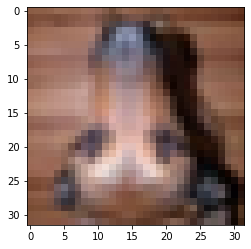

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

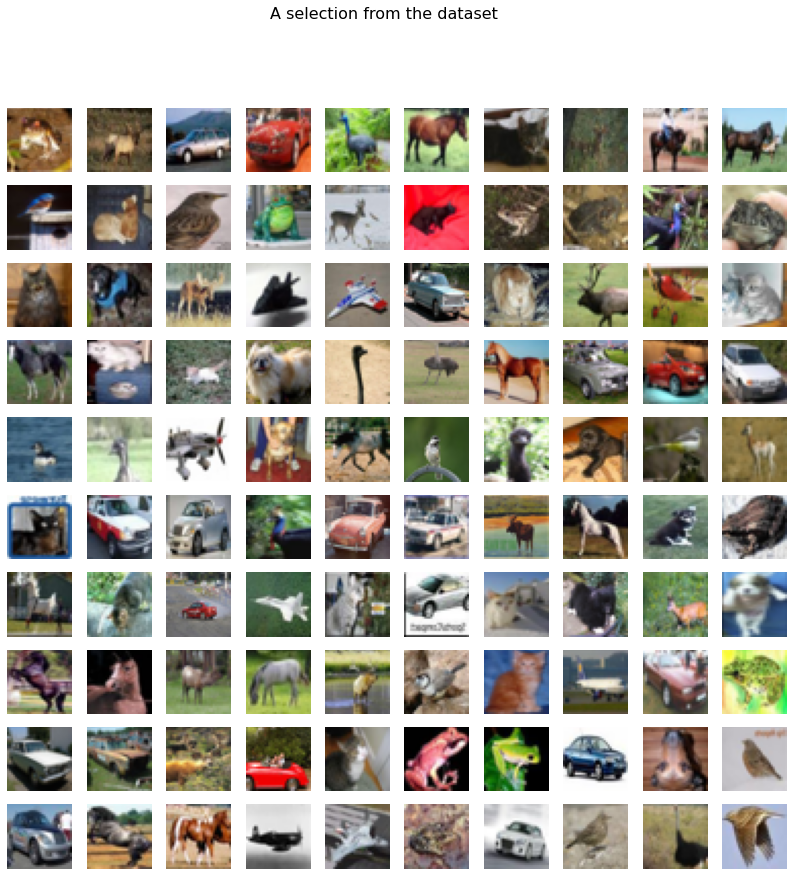

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx].reshape((32, 32, 3)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
#vgg16.summary()
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 12s 33ms/step - loss: 2.0904 - accuracy: 0.1246
test loss, test acc: [2.0903549194335938, 0.12457499653100967]
Evaluate on test data
16/16 [==============================] - 1s 85ms/step - loss: 2.0912 - accuracy: 0.1246
test loss, test acc: [2.091242790222168, 0.12462499737739563]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 14s 31ms/step - loss: 1.9215 - accuracy: 0.2597 - val_loss: 1.8030 - val_accuracy: 0.3476
Epoch 2/250
400/400 [==============================] - 12s 30ms/step - loss: 1.5872 - accuracy: 0.4150 - val_loss: 1.4499 - val_accuracy: 0.4651
Epoch 3/250
400/400 [==============================] - 12s 30ms/step - loss: 1.3828 - accuracy: 0.4929 - val_loss: 1.3472 - val_accuracy: 0.5148
Epoch 4/250
400/400 [==============================] - 12s 30ms/step - loss: 1.2483 - accuracy: 0.5460 - val_loss: 1.2983 - val_accuracy: 0.5325
Epoch 5/250
400/400 [==============================] - 12s 30ms/step - loss: 1.1405 - accuracy: 0.5905 - val_loss: 1.1598 - val_accuracy: 0.5776
Epoch 6/250
400/400 [==============================] - 12s 30ms/step - loss: 1.0422 - accuracy: 0.6249 - val_loss: 1.0371 - val_accuracy: 0.6300
Epoch 7/250
400/400 [==============================] - 12s 30ms/step - loss: 0.9474 - accuracy: 0.6609 - val_loss: 0.9916 - val_ac

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 2s 30ms/step - loss: 6.0466e-07 - accuracy: 1.0000
test loss, test acc: [6.04664194270299e-07, 1.0]
Evaluate on test data
16/16 [==============================] - 0s 29ms/step - loss: 2.9856 - accuracy: 0.7399
test loss, test acc: [2.985609531402588, 0.7398750185966492]


# Small

In [12]:
small = models.small(totalClass)
#small.summary()
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 1s 7ms/step - loss: 27.9417 - accuracy: 0.1254
test loss, test acc: [27.94169044494629, 0.12542499601840973]
Evaluate on test data
16/16 [==============================] - 0s 12ms/step - loss: 28.2138 - accuracy: 0.1236
test loss, test acc: [28.213769912719727, 0.1236250028014183]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 4s 7ms/step - loss: 3.4332 - accuracy: 0.2607 - val_loss: 1.5557 - val_accuracy: 0.4450
Epoch 2/250
400/400 [==============================] - 3s 7ms/step - loss: 1.5697 - accuracy: 0.4167 - val_loss: 1.3692 - val_accuracy: 0.5031
Epoch 3/250
400/400 [==============================] - 3s 7ms/step - loss: 1.4196 - accuracy: 0.4791 - val_loss: 1.2755 - val_accuracy: 0.5374
Epoch 4/250
400/400 [==============================] - 3s 7ms/step - loss: 1.3319 - accuracy: 0.5124 - val_loss: 1.2229 - val_accuracy: 0.5570
Epoch 5/250
400/400 [==============================] - 3s 7ms/step - loss: 1.2612 - accuracy: 0.5406 - val_loss: 1.1526 - val_accuracy: 0.5865
Epoch 6/250
400/400 [==============================] - 3s 7ms/step - loss: 1.2013 - accuracy: 0.5619 - val_loss: 1.1465 - val_accuracy: 0.5903
Epoch 7/250
400/400 [==============================] - 3s 7ms/step - loss: 1.1507 - accuracy: 0.5817 - val_loss: 1.0948 - val_accuracy: 0.6061

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 1s 7ms/step - loss: 0.2531 - accuracy: 0.9252
test loss, test acc: [0.2530842423439026, 0.925225019454956]
Evaluate on test data
16/16 [==============================] - 0s 6ms/step - loss: 0.7315 - accuracy: 0.7835
test loss, test acc: [0.7314943075180054, 0.7835000157356262]


#tNet

In [16]:
tNet = models.tNet(totalClass)
#tNet.summary()

In [17]:
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [18]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 4s 40ms/step - loss: 3.6075 - accuracy: 0.1250
test loss, test acc: [3.6075336933135986, 0.125]
Evaluate on test data
16/16 [==============================] - 1s 67ms/step - loss: 3.6188 - accuracy: 0.1250
test loss, test acc: [3.618824005126953, 0.125]


In [19]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 18s 40ms/step - loss: 1.7511 - accuracy: 0.3685 - val_loss: 1.7104 - val_accuracy: 0.3915
Epoch 2/250
400/400 [==============================] - 16s 39ms/step - loss: 1.3718 - accuracy: 0.5080 - val_loss: 1.6137 - val_accuracy: 0.4597
Epoch 3/250
400/400 [==============================] - 16s 39ms/step - loss: 1.1742 - accuracy: 0.5824 - val_loss: 1.1966 - val_accuracy: 0.5674
Epoch 4/250
400/400 [==============================] - 16s 39ms/step - loss: 1.0179 - accuracy: 0.6403 - val_loss: 1.1607 - val_accuracy: 0.5832
Epoch 5/250
400/400 [==============================] - 16s 39ms/step - loss: 0.8712 - accuracy: 0.6959 - val_loss: 1.2133 - val_accuracy: 0.5919
Epoch 6/250
400/400 [==============================] - 16s 39ms/step - loss: 0.7361 - accuracy: 0.7476 - val_loss: 1.0713 - val_accuracy: 0.6345
Epoch 7/250
400/400 [==============================] - 16s 39ms/step - loss: 0.6063 - accuracy: 0.7949 - val_loss: 1.2003 - val_ac

In [20]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 3s 39ms/step - loss: 3.3714e-04 - accuracy: 0.9999
test loss, test acc: [0.0003371420025359839, 0.9998999834060669]
Evaluate on test data
16/16 [==============================] - 1s 38ms/step - loss: 2.1188 - accuracy: 0.6811
test loss, test acc: [2.1187708377838135, 0.6811249852180481]


# ConvNet

In [21]:
convNet = models.convNet(totalClass)
#convNet.summary()

In [22]:
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 7s 50ms/step - loss: 3.2463 - accuracy: 0.1282
test loss, test acc: [3.2463362216949463, 0.12817500531673431]
Evaluate on test data
16/16 [==============================] - 2s 132ms/step - loss: 3.2471 - accuracy: 0.1271
test loss, test acc: [3.247145175933838, 0.12712499499320984]


In [28]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 16s 40ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 1.1903 - val_accuracy: 0.8400
Epoch 2/250
400/400 [==============================] - 15s 39ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 1.1991 - val_accuracy: 0.8394
Epoch 3/250
400/400 [==============================] - 15s 39ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 1.2157 - val_accuracy: 0.8441
Epoch 4/250
400/400 [==============================] - 16s 39ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 1.1972 - val_accuracy: 0.8396
Epoch 5/250
400/400 [==============================] - 15s 39ms/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 1.2118 - val_accuracy: 0.8418
Epoch 6/250
400/400 [==============================] - 15s 39ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 1.1566 - val_accuracy: 0.8432
Epoch 7/250
400/400 [==============================] - 16s 39ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 1.1911 - val_ac

In [29]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 4s 46ms/step - loss: 2.4894e-06 - accuracy: 1.0000
test loss, test acc: [2.4893772661016556e-06, 1.0]
Evaluate on test data
16/16 [==============================] - 1s 45ms/step - loss: 1.3181 - accuracy: 0.8446
test loss, test acc: [1.3180574178695679, 0.8446249961853027]


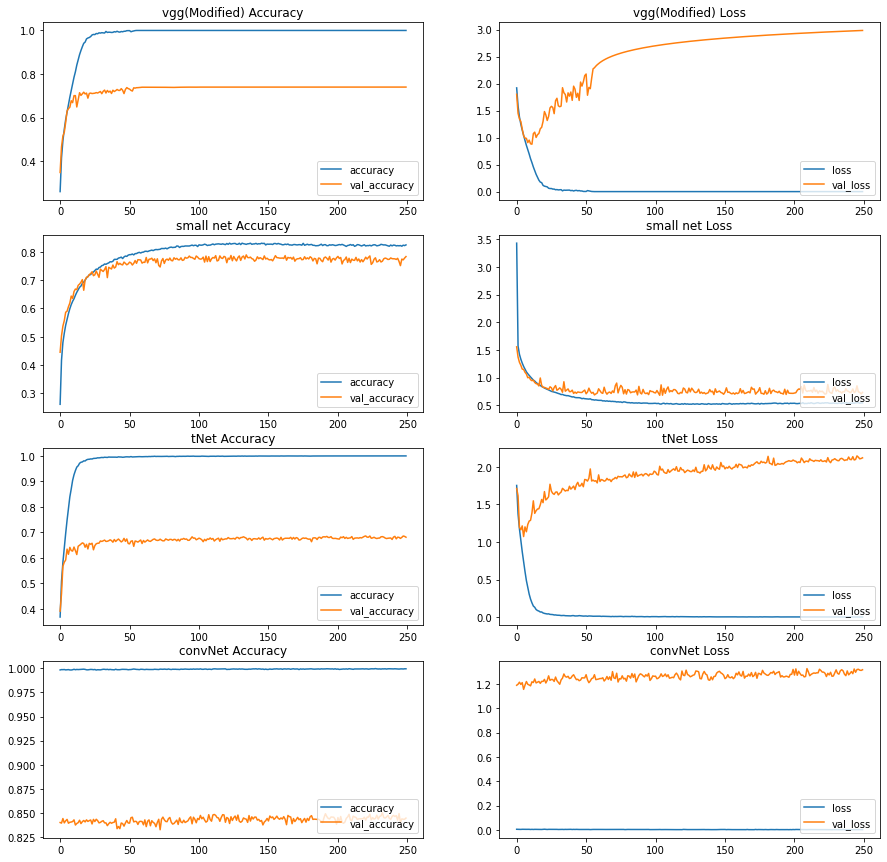

In [30]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1